In [2]:
import tweepy
from tweepy import OAuthHandler

consumer_key = 'xn1OxyjYV85opWoDZfVz8otFe'
consumer_secret = 'NHplMlP5iR5lMVJJmVL8SuSpO3vSjeC3EY2Vhocjr5qu3G8F7e'
access_token = '702119990292561920-OSI2DOoqfcbZ1bfvS03UCSw0MqSgfif'
access_secret = 'Q73xAW38Ba9UNkQoEzdSQB7jSiaql0nRFWqAOn2bQHv3D'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api = tweepy.API(auth)

In [ ]:
print('Tweeter Account Owner: ' + user.name)
# print 'Tweeter Account Owner: {}'.format(user.name)
# print('Location: ' + user.location)
# print('Friends: ' + str(user.followers_count))
# print('Created: ' + str(user.created_at))
# print('Description: ' + str(user.description))

# Ethereum Stream
Stream started on 20:55 on 01.05.2017.
Stream ended on 21:40 on 01.05.2017.
471 tweets were gathered.

In [4]:
from tweepy import Stream
from tweepy.streaming import StreamListener
 
class EthereumListener(StreamListener):
 
    def on_data(self, data):
        try:
            with open('Ethereum.json', 'a') as f:
                f.write(data)
                global tweetcount
                tweetcount += 1
                if not(tweetcount%40):
                    print " +"
                else:
                    print " +",
                return True
        except BaseException as e:
            print("Error on_data: %s" % str(e))
        return True
 
    def on_error(self, status):
        print(status)
        return True
 
tweetcount = 0
print "\nTweets received:"
twitter_stream = Stream(auth, EthereumListener())
twitter_stream.filter(track=['Ethereum'])

KeyboardInterrupt: 

# Regex for processing and filter for stopwords/tweet words

In [5]:
import re
 
emoticons_str = r"""
   (?:
        [<>]?
        [:;=8]                          # eyes
        [\-o\*\'-]?                     # optional nose
        [\)\]\(\[dDpP/\:\>\<\}\{@\|\\]  # mouth
        |
        [\)\]\(\[dDpP/\:\>\<\}\{@\|\\]  # mouth
        [\-o\*\'-]?                     # optional nose
        [:;=8]                          # eyes
        [<>]?
        |
        <3                              # heart
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    # ur'(?:\b\w+\b)', # other Unicode words with diacriticals
    r'(?:[\w_]+)',  # other words 
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    # return tokens_re.findall(s,re.UNICODE)
    # The re.UNICODE flag permits the use of word characters, \w, and word boundaries, \b,
    # with diacriticals (accents and tildes).
    return tokens_re.findall(s)

def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

In [6]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords") # download the stopword corpus on our computer
import string
 
punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation + ['rt', 'via', 'RT']





[nltk_data] Downloading package stopwords to /home/ckb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Actual tweet processing
## Handy function for filtering terms
_Filter function has term as first argument_

In [7]:
import operator 
import json
from collections import Counter

fname = 'Ethereum.json'

def filter_terms(filter_fn):
    with open(fname, 'r') as f:
        count_all = Counter()
        for line in f:
            # tweet = json.loads(line.decode('utf8'))  ########
            tweet = json.loads(line)
            # terms_hash = [term.encode('utf-8') for term in preprocess(tweet['text']) if filter_fn(term)]   ########    
            terms_hash = [term for term in preprocess(tweet['text']) if filter_fn(term)]
            count_all.update(terms_hash)
        return count_all


# Most common hashtags

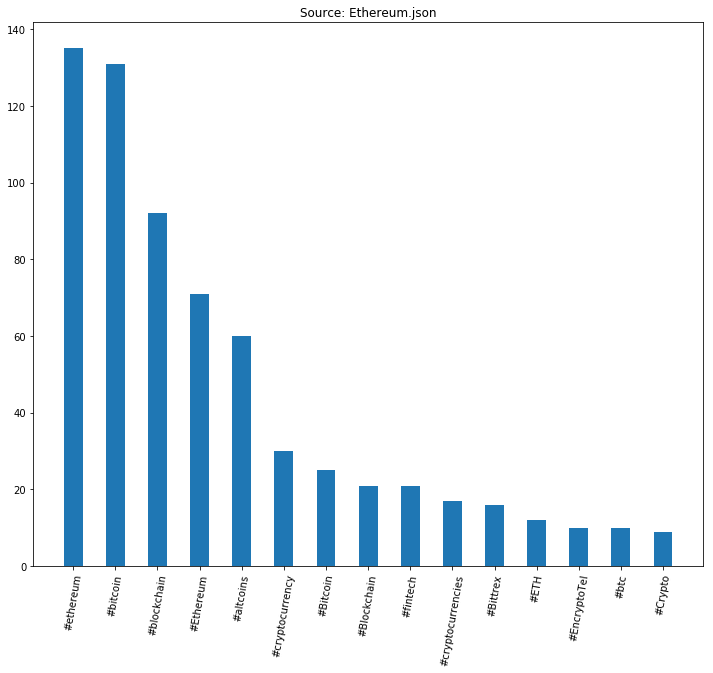

In [12]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = (12,10)

count_all = filter_terms(lambda term: term.startswith("#") and term not in stop)
# The use of the lambda function above can result in somewhat slower processing.

sorted_x, sorted_y = zip(*count_all.most_common(15))
#print(sorted_x, sorted_y)

plt.bar(range(len(sorted_x)), sorted_y, width=0.45, align='center');
plt.xticks(range(len(sorted_x)), sorted_x, rotation=80);
plt.axis('tight');
plt.title('Source: Ethereum.json');

# Most mentions

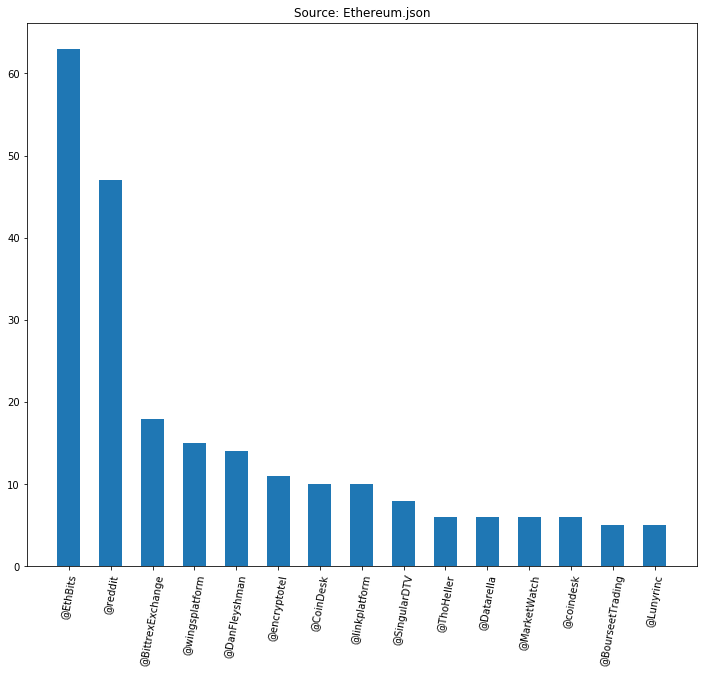

In [11]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = (12,10)

count_all = filter_terms(lambda term: term.startswith("@") and term not in stop)

sorted_x, sorted_y = zip(*count_all.most_common(15))
#print(sorted_x, sorted_y)

plt.bar(range(len(sorted_x)), sorted_y, width=0.55, align='center');
plt.xticks(range(len(sorted_x)), sorted_x, rotation=80);
plt.axis('tight');
plt.title('Source: Ethereum.json');

#### ***Apply filter on word-beginning. Remove words which start with any of two unicode characters.***

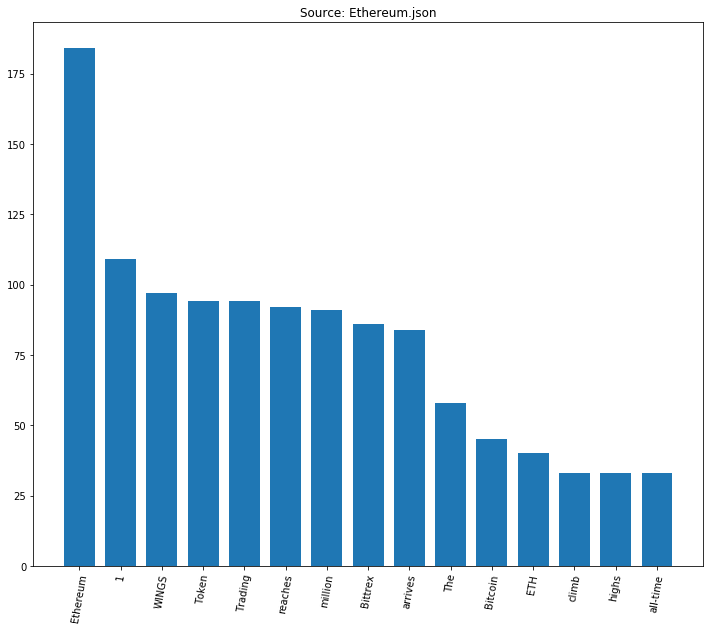

In [14]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = (12,10)

# Filter for the starting words. 
# Removes two unicode signs: horizontal ellipsis "..." (U+2026) and dash "-" (U+2013) 
filter_starting = ("@", "#", u"\u2026", u"\u2013")
count_all = filter_terms(lambda term: not term.startswith(filter_starting) and term not in stop)

sorted_x, sorted_y = zip(*count_all.most_common(15))
#print(sorted_x, sorted_y)

plt.bar(range(len(sorted_x)), sorted_y, width=0.75, align='center');
plt.xticks(range(len(sorted_x)), sorted_x, rotation=80);
plt.axis('tight'); 
plt.title('Source: Ethereum.json');